## 1. Set up Environment


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = 8,6
import seaborn as sb
sb.set()

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## 2. Download stock price data, store in dataframe

In [2]:
amzn = yf.download('AMZN')

[*********************100%%**********************]  1 of 1 completed


In [3]:
amzn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000
2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800


## 4. Store instantaneous rate of return in separate series

In [4]:
amzn_close = amzn["Close"]
amzn_return = np.log(amzn_close).diff()
amzn_return.head()

Date
1997-05-15         NaN
1997-05-16   -0.124461
1997-05-19   -0.012114
1997-05-20   -0.043623
1997-05-21   -0.136269
Name: Close, dtype: float64

## 5. Plot the series

<Axes: xlabel='Date'>

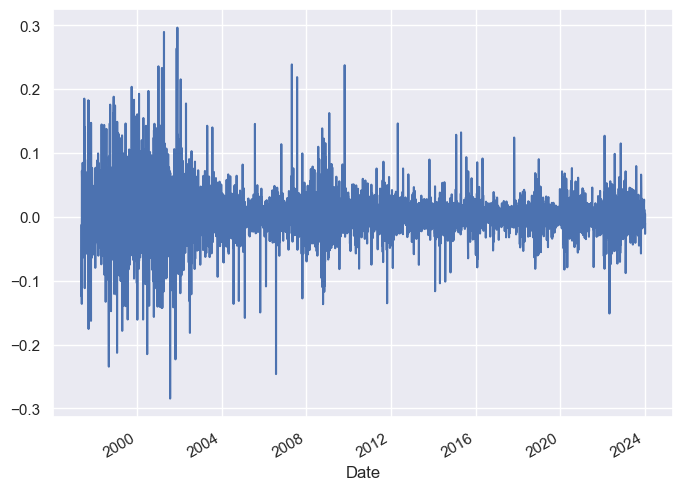

In [5]:
amzn_return.plot()

## 6. Pandas describe function gives descriptive statistics, default assumes you are dealing with a sample Pandas also deals with missing values by omitting them

In [6]:
amzn_return.describe()

count    6704.000000
mean        0.001089
std         0.035256
min        -0.284568
25%        -0.013248
50%         0.000414
75%         0.014702
max         0.296181
Name: Close, dtype: float64

In [7]:
amzn_return.dropna(inplace = True)
amzn_return.describe()

count    6704.000000
mean        0.001089
std         0.035256
min        -0.284568
25%        -0.013248
50%         0.000414
75%         0.014702
max         0.296181
Name: Close, dtype: float64

## 7. An alternative more slightly different table of descriptives from scipy stats

In [8]:
from scipy import stats

In [9]:
stats.describe(amzn_return)

DescribeResult(nobs=6704, minmax=(-0.2845678277981933, 0.2961810679830656), mean=0.0010892038638201517, variance=0.0012429985636089917, skewness=0.4499510575634065, kurtosis=9.333004020667053)

In [10]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5


## 9. for comparision generate random numbers that follow normal distribution

In [11]:
from scipy.stats import norm

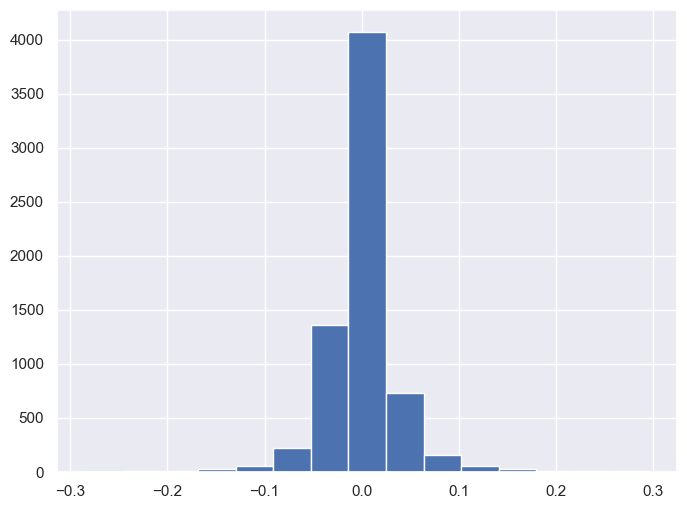

In [12]:
plt.hist(amzn_return, bins = 15);

In [13]:
from scipy.stats import norm
x= norm.rvs(mean, std, n)

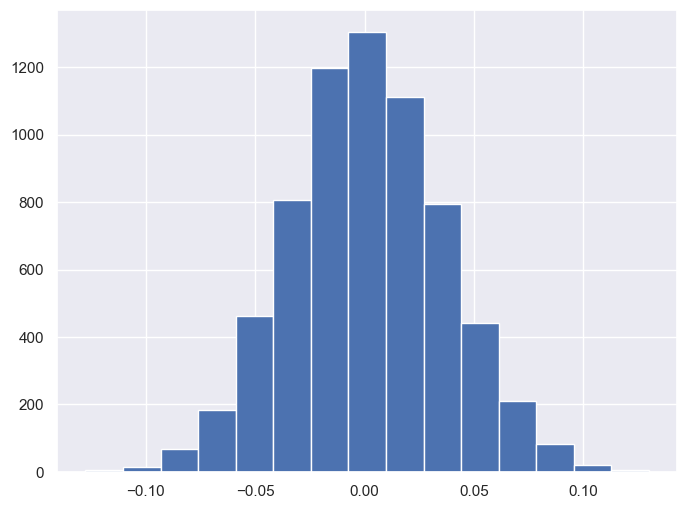

In [14]:
plt.hist(x, bins = 15);

In [15]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"   Test Statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"*30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

   Test Statistic           p-value
     ------------------------------
x:             0.36          0.7155
AMZN:         33.61          0.0000


## 11. Plot histogram of price changes with normal curve overlay

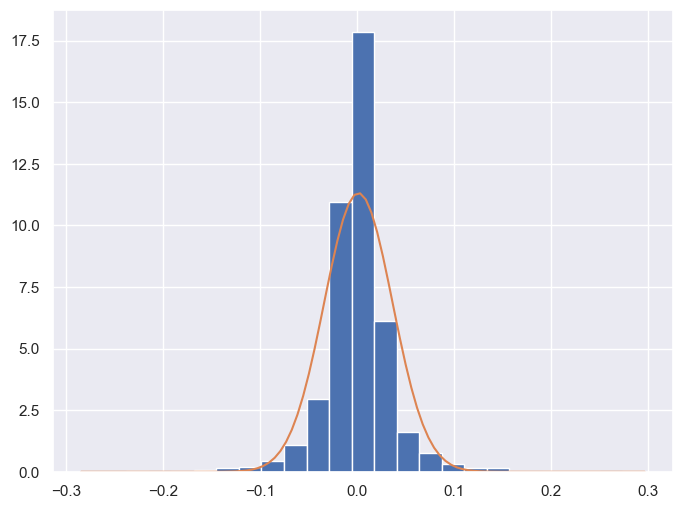

In [16]:
plt.hist(amzn_return, bins = 25, edgecolor = "w", density = True)
overlay = np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));

## Is the daily price change significantly different from Zero?

In [17]:
stats.ttest_1samp(amzn_return, 0, alternative = "two-sided")

TtestResult(statistic=2.5295359888994393, pvalue=0.011444072893855314, df=6703)

## Can price movement be described as a random walk?


## 14. Create Price Lags


In [18]:
amzn_close = pd.DataFrame(amzn_close, columns = ["Close"])
amzn_close["lag_1"] = amzn_close.Close.shift(1)
amzn_close["lag_2"] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
1997-05-19,0.085417,0.086458,0.097917
1997-05-20,0.081771,0.085417,0.086458
1997-05-21,0.071354,0.081771,0.085417
1997-05-22,0.069792,0.071354,0.081771
1997-05-23,0.075000,0.069792,0.071354


## 15. Fit linear model

In [19]:
np.linalg.lstsq(amzn_close[["lag_1", "lag_2"]], amzn_close["Close"], rcond = None)[0]

array([0.97490129, 0.02531282])

In [25]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', "lag_2"]], lr)
amzn_close.head()

TypeError: unsupported operand type(s) for *: 'float' and 'LinearRegression'